##### Daniele Mellino 2013373
## Exercise 1 -vectors and data frames
Initially I import the used library.

In [2]:
#import libraries
library(ggplot2)
library(tidyverse)
suppressWarnings(require(RColorBrewer))
library(gridExtra)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: RColorBrewer


ERROR: Error in library(gridExtra): there is no package called ‘gridExtra’


Let' s start with the creation of the vectors that holds the lake's name and all the parameters, after that we can create the dataframe scottish.lakes

In [2]:
#fill vectors
names  <-   c("Loch Ness","Loch Lomond","Loch Morar" ,"Loch Tay"  ,
             "Loch Awe" ,"Loch Maree" ,"Loch Ericht","Loch Lochy",
             "Loch Rannoch","Loch Shiel", "Loch Katrine", 
             "Loch Arkaig" ,"Loch Shin")
volume <-   c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 
              0.79, 0.77, 0.75, 0.35)
area   <-   c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4,
              16, 22.5)
length <-   c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9,
              19.3, 27.8)
max_depth<- c(230, 190, 310, 150 ,94  ,114 ,156 ,162 ,134 ,128,
              151 ,109, 49)
mean_depth<-c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4,
              46.5, 15.5)

#create dataframe
scottish.lakes<- data.frame( names, volume, area, 
                             length, max_depth, mean_depth  )

scottish.lakes

names,volume,area,length,max_depth,mean_depth
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0
Loch Shiel,0.79,19.5,28.0,128,40.0


#### 1. Evaluate the highest and lowest volume and area lake


In [3]:
cat(
    sprintf("The lake with lowest volume is: %s  with %.2f km^3 ",
        scottish.lakes$names[which.min(scottish.lakes$volume)],
        min(scottish.lakes$volume))
     ) 

cat(
    sprintf("\nThe lake with highest volume is: %s  with %.2f km^3 ",
        scottish.lakes$names[which.max(scottish.lakes$volume)],
        max(scottish.lakes$volume))
     ) 

The lake with lowest volume is: Loch Shin  with 0.35 km^3 
The lake with highest volume is: Loch Ness  with 7.45 km^3 

#### 2. Order the frame with respect to the area and determine the two largest area lakes

In [4]:
#order the frame in descending order of area
scottish.lakes <-scottish.lakes[order(scottish.lakes$area,decreasing=T),]
scottish.lakes
#print the bigger two 

cat(
    sprintf("The lake with largest area is: %s  with %.1f km^2\nfollowed by: %s with %.1f km^2",
            scottish.lakes$names[1],
            min(scottish.lakes$area[1]),
            scottish.lakes$names[2],
            min(scottish.lakes$area[2])
            )
     ) 



,names,volume,area,length,max_depth,mean_depth
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0
7,Loch Ericht,1.08,18.6,23.0,156,57.6


The lake with largest area is: Loch Lomond  with 71.0 km^2
followed by: Loch Ness with 56.0 km^2

#### 3.  Determine the area of Scotland covered by water.

In [5]:
cat(
    sprintf("The sum of the lake's area of Scotland is: %.1f km^2 ",
        sum(scottish.lakes$area))
     ) 

The sum of the lake's area of Scotland is: 372.0 km^2 

## Exercise 2 - Crude Oil production
#### 1. Write R code that is able to read the file and import it in a data frame structure. 

In [6]:
#get the id and the url to get the data
id<- "1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3"
url    <- "https://drive.google.com/uc?id=%s&export=download"
#read the data
datac <-  read.table(sprintf(url,id),header=T,fill=T,sep=",")
#str(datac) #check that it's a data.frame
head(datac)

Entity,Code,Year,OilPrice
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74


#### 2. Produce a plot with the Oil price as a function of the year

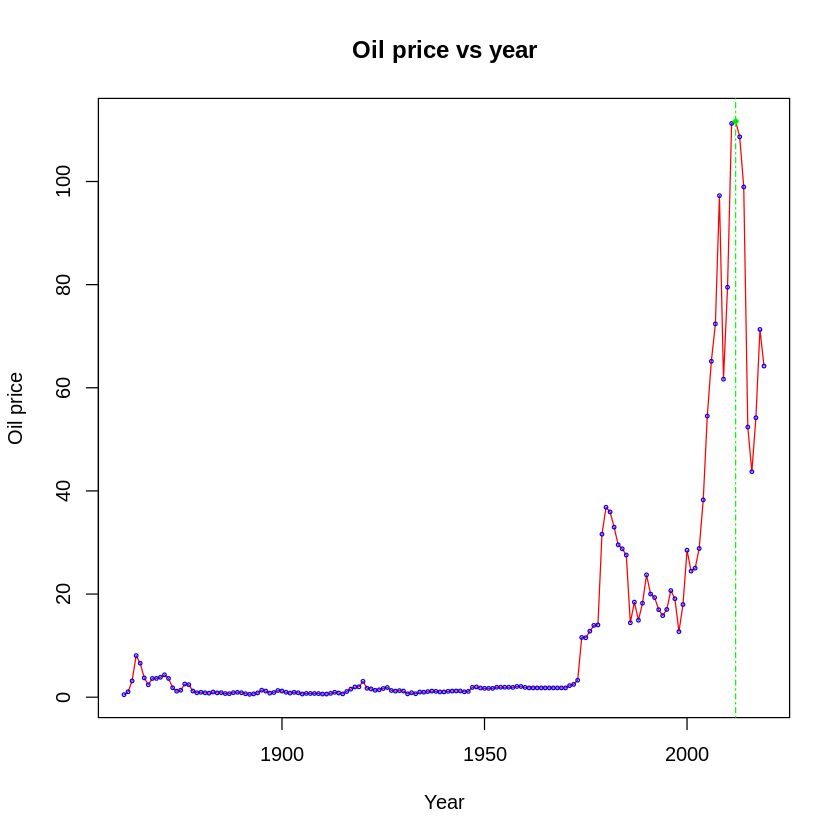

In [7]:
plot(datac$Year,datac$OilPrice,type="l",col="red",
     xlab="Year",ylab="Oil price", main="Oil price vs year")
points(datac$Year,cex=0.4,datac$OilPrice,col="blue")
max<-max(datac$OilPrice)
year_m<-datac$Year[which.max(datac$OilPrice)]
points(y=max,x=year_m,col="green",cex=0.5,pch=23,bg=3)
abline(v=year_m,col='green',lty=4)


#### 3. Which is the highest price in history ?  When did it occur ?

In [8]:
cat(
    sprintf("The highest price in history is: %.2f US dollars per gallon.\nIt occurs in %s",
        max,year_m
           )
     ) 

The highest price in history is: 111.67 US dollars per gallon.
It occurs in 2012

#### 4.  Plot the derivative of the curve, simply evaluated with the finite difference formula

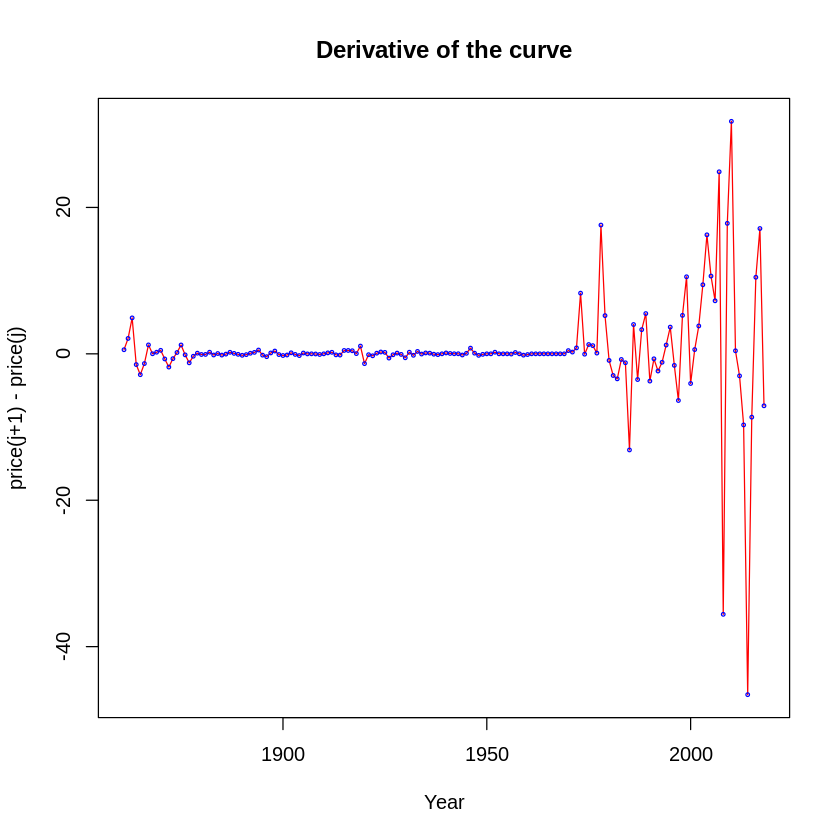

In [9]:
#store the difference point to point in the column derivat
price_derivative<-transmute(datac,year=datac$Year,
                       price_jj=datac$OilPrice,
                       price_j=c(price_jj[-1],0),
                       derivat=price_j-price_jj)
#eliminate the last row
price_derivative<-price_derivative[-length(price_derivative$price_jj),]
#price_derivative

#Plot:
plot(price_derivative$year,price_derivative$derivat,type="l",col="red",
     xlab="Year",ylab="price(j+1) - price(j)", main="Derivative of the curve")

points(x=price_derivative$year,cex=0.4,y=price_derivative$derivat,col="blue")



## Exercise 3 - World Coal Production
#### 1. Write R code that is able to read the file and import it in a tibble structure

In [10]:
#Read the file using read_csv--> the result is a tibble:
id <- "10kgRQGKEC81QoVW9kj8goNzzyLcT0xld"
url<- "https://docs.google.com/uc?id=%s&export=download"
data_coal_o <- read_csv(sprintf(url,id))
# notice : it prints out a column specification that gives the name and type of each column
head(data_coal_o)

Parsed with column specification:
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)


Entity,Code,Year,Coal production (TWh)
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


#### 2. Count the number of countries available in the file and produce a barplot with the number of entries for each country

The number of countries available is: 200

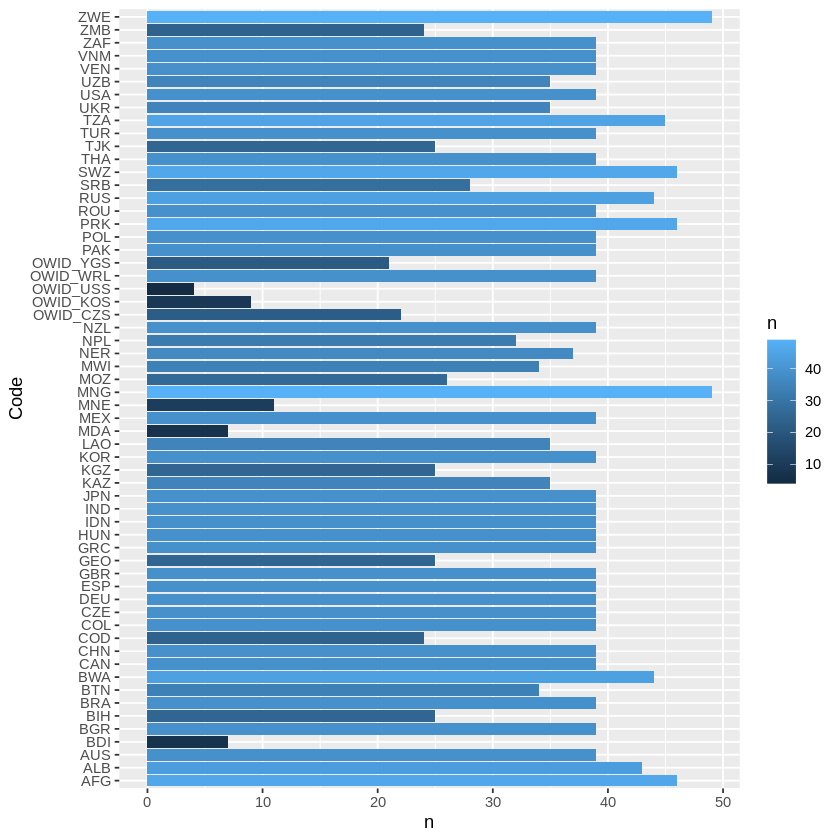

In [11]:
#Count the number of countries in the file
available_country<-unique(data_coal_o$Entity)
cat(
    sprintf("The number of countries available is: %.0f",
        length(available_country))
     ) 
# we have 200 countries, here I filter it
data_coal<-data_coal_o%>% filter(`Coal production (TWh)`>0) # I delete the year in which there' s no production
data_coal<-data_coal%>% filter(Year>1970 & !is.na(Code)) #consider the year after 1970
coal_pl<-data_coal%>% count(Code)

myColors <-rep( brewer.pal(6, "Set2"),10)
names(myColors) <- coal_pl$n

#so I do a barplot of the country that after 1970 produced Coal,
#n indicates the number of year production after 1970 
p<-ggplot(data=coal_pl,aes(x=Code, y=n,fill=n) )+
  geom_bar(stat="identity")
p + coord_flip() 


#### 3. Selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

Entity,productions
World,1260113.24
China,459564.65
United States,226068.84
Russia,98251.65
Australia,83077.07
India,77043.45


In the table above we can see the top 5 countries with highest coal production 

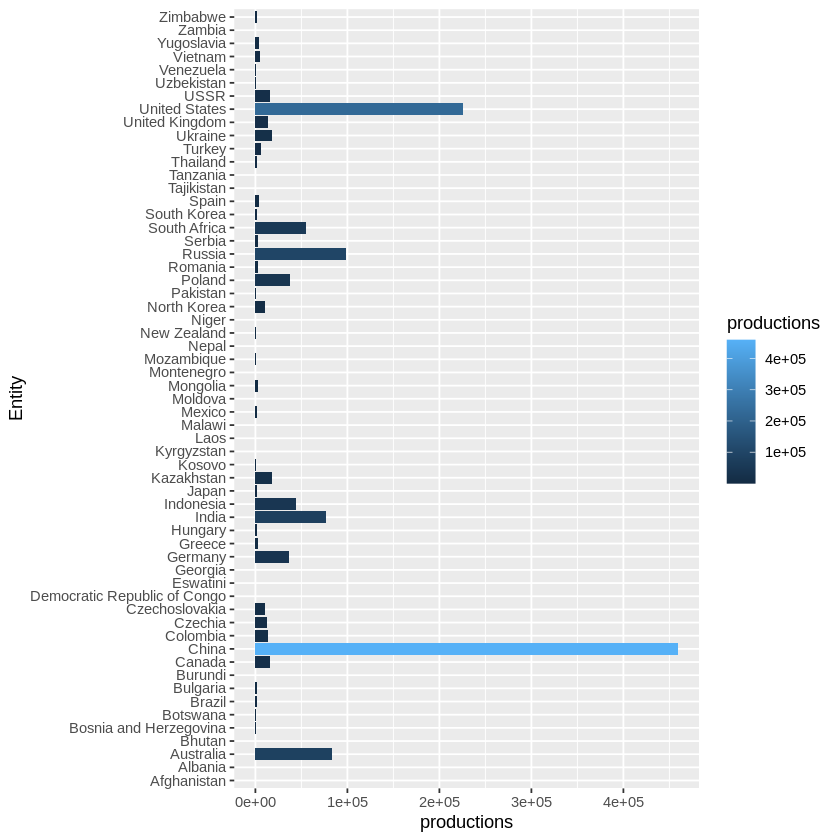

In [12]:
#head(data_coal)
coal_3<-data_coal %>% group_by(Entity) %>% summarise(productions = sum(`Coal production (TWh)`) )
coal_3<-coal_3[order(coal_3[["productions"]],decreasing=TRUE),]
head(coal_3,6) #coal_3 contains countries and their relative productions, ordered in a decreasing way
cat( "In the table above we can see the top 5 countries with highest coal production ")


#let's plot them (let' s not consider World)
names(myColors) <- coal_3$productions
q<-ggplot(data=coal_3[-1,],aes(x=Entity, y=productions,fill=productions) )+
  geom_bar(stat="identity")
q + coord_flip() 


#### 4. For the 5 top Countries, create a plot of production as a function of time


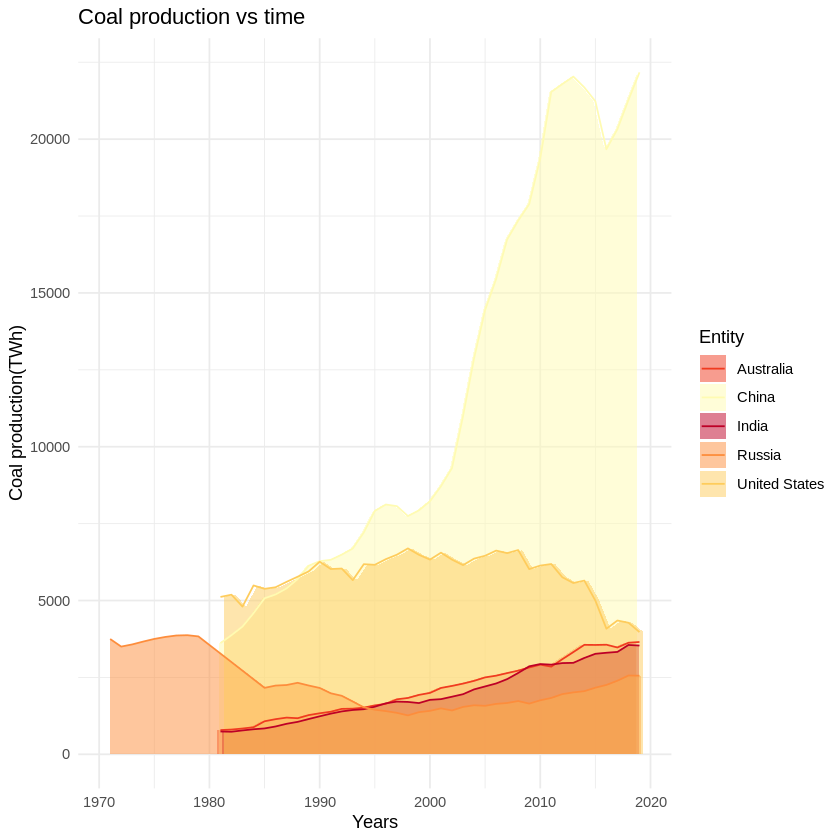

In [13]:
library(tidyverse)

coal_4<-data_coal_o%>% filter(Year>1970) #consider the year after 1970

coal_4 <- coal_4%>%
  filter(Entity=="China" | Entity=="United States" | Entity=="Russia" | Entity=="Australia" | Entity=="India")



palett<-c("#F03B20", "#FFFBB2","#BD0026","#FD8D3C","#FECC5C")

ggplot(coal_4, aes(x=ifelse(Year>0, Year, 0),y=`Coal production (TWh)`, fill=Entity)) + 
    geom_area(alpha = 0.5,position=position_dodge(.9))+
    scale_fill_manual(values = palett)+
    theme_minimal()+ 
    geom_line(data=coal_4,aes(colour=Entity))+scale_colour_manual(values = palett)+
     labs(title = "Coal production vs time",
     x = "Years",
     y = "Coal production(TWh)")


#### 5. Generate a plot with the cumulative sum of the World’s coal production over the years

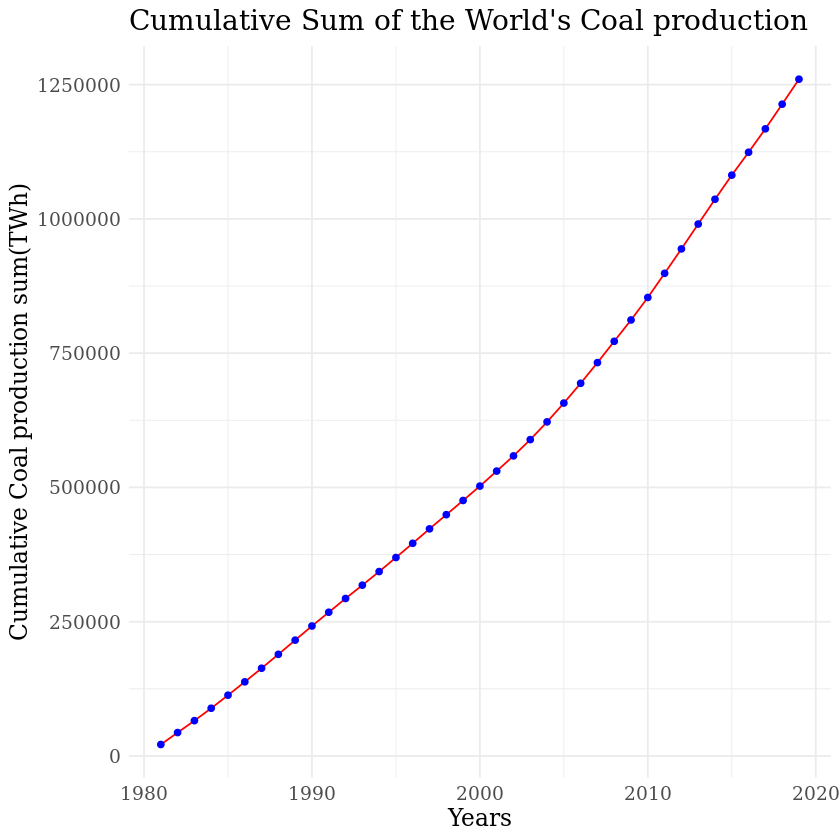

In [14]:
coal_5<-data_coal_o%>%filter(Entity=="World") #take the world's data

coal_5<-coal_5%>%mutate(cum_sum=cumsum(`Coal production (TWh)`))


#plot(coal_5$Year,coal_5$cum_sum,type="l",col="red",
#     xlab="Year",ylab="Cumulative Coal production sum(TWh)", main="Cumulative Sum of the World's Coal production")

#points(x=coal_5$Year,cex=.5,y=coal_5$cum_sum,col="blue",pch=22)

ggplot(coal_5,aes(x=Year,y=cum_sum) ) + geom_line(colour="red")+geom_point(colour="blue")+
        labs(title = "Cumulative Sum of the World's Coal production",
             x = "Years",
             y = "Cumulative Coal production sum(TWh)")+
        theme_minimal() +
        theme(text = element_text(family = "Garamond",
                            size = 14))




## Exercise 4 - Covid19 Vaccine data
#### 1.1 Filter() the original tibble by selecting the following countries:  Italy

In [6]:
#charge the data in a tibble
#this url is the one of the raw data
urlfile<- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
tibble_vacc <- read_csv(url(urlfile))
#select the one of the Italy
ita_vacc<-tibble_vacc%>%filter(location=="Italy")
#str(ita_vacc)
str(tibble_vacc)

Parsed with column specification:
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)


Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	7004 obs. of  4 variables:
 $ location          : chr  "Austria" "Austria" "Austria" "Austria" ...
 $ date              : Date, format: "2021-01-08" "2021-01-08" ...
 $ vaccine           : chr  "Johnson&Johnson" "Moderna" "Oxford/AstraZeneca" "Pfizer/BioNTech" ...
 $ total_vaccinations: num  0 0 0 30846 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   location = col_character(),
  ..   date = col_date(format = ""),
  ..   vaccine = col_character(),
  ..   total_vaccinations = col_double()
  .. )


#### 1.2 Plot the number of vaccines given as a function of time for the different vaccine manufacturer

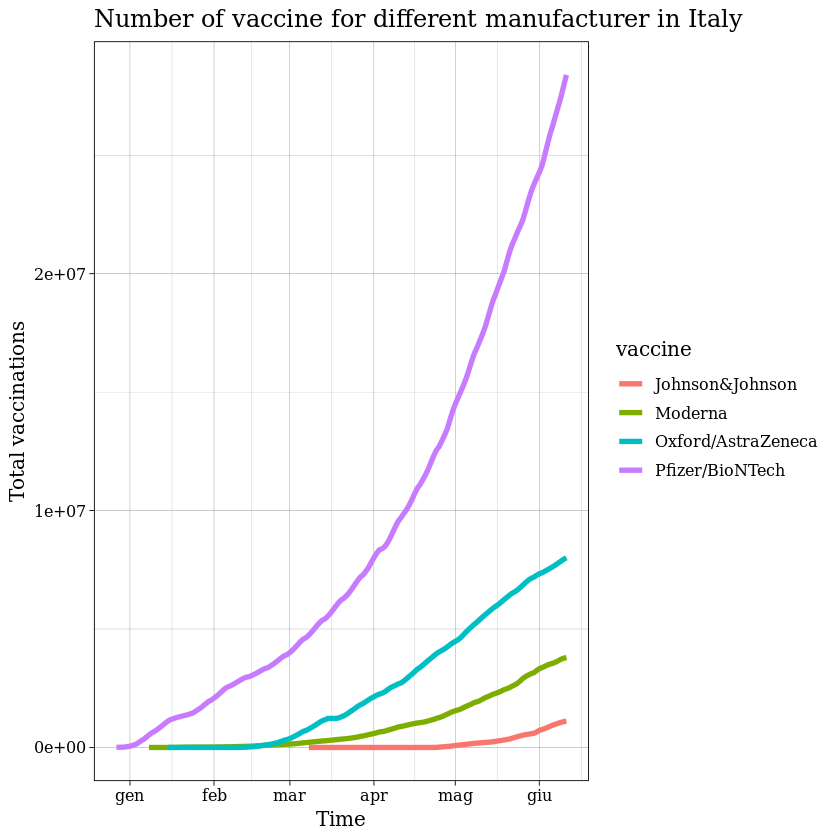

In [7]:
ita_plot1<-ggplot(ita_vacc, aes(x=date,y=total_vaccinations, fill=vaccine)) + 
            geom_line(data=ita_vacc,aes(colour=vaccine),size=1.5) +
            labs(title = "Number of vaccine for different manufacturer in Italy",
                 x = "Time",
                 y = "Total vaccinations")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 12))

ita_plot1

#### 1.3  From the same tibble plot the total number of vaccines shot per day in Italy

date,daily_cum_doses,daily_doses
2020-12-27,7218,7218
2020-12-28,8647,1429
2020-12-29,9662,1015
2020-12-30,14393,4731
2020-12-31,39889,25496
2021-01-01,50955,11066


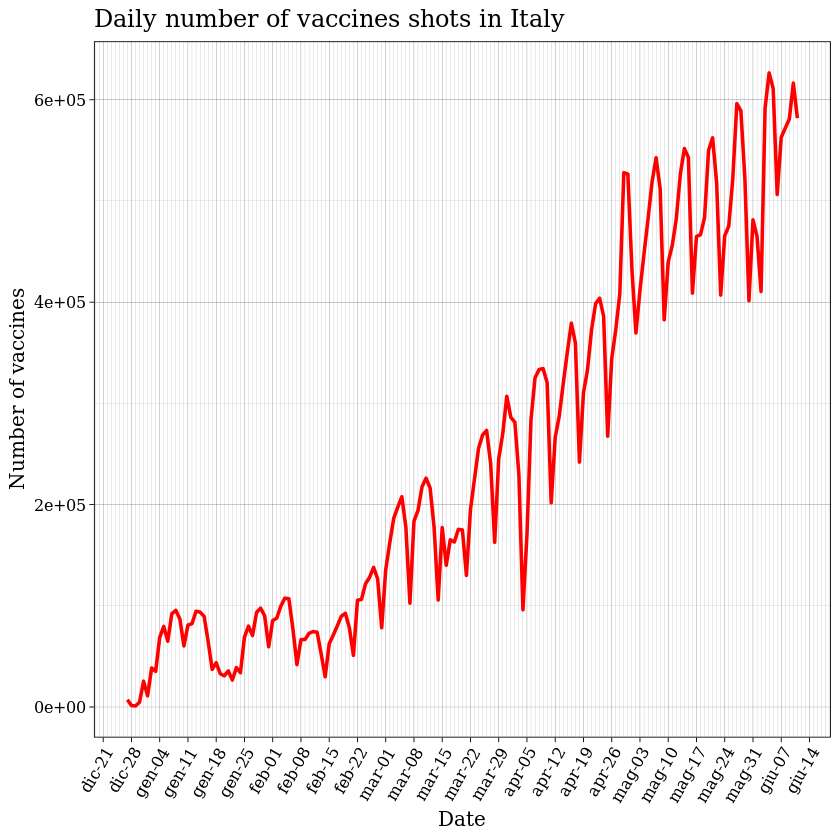

In [8]:
#sum the various type per day
daily_ita <-ita_vacc%>%group_by(date) %>% summarise(daily_cum_doses = sum(total_vaccinations) )
#retrieve the daily vaccines
daily_ita <-daily_ita%>%mutate(.,daily_doses=daily_cum_doses-c(0,daily_cum_doses[-length(daily_cum_doses)]))
head(daily_ita)


ita_plot2<-ggplot(daily_ita, aes(x=date,y=daily_doses)) + 
            geom_line(data=daily_ita,size=1,colour="red") +
            labs(title = "Daily number of vaccines shots in Italy",
                 x = "Date",
                 y = "Number of vaccines")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 12),
                 axis.text.x=element_text(angle=60, hjust=1))+
            scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")

ita_plot2
## Note the drop during the week-end

#### 1.4 Do the same exercise for the following countries:  Germany and United States of America

In [9]:
G_vacc<-tibble_vacc%>%filter(location=="Germany" )
U_vacc<-tibble_vacc%>%filter(location=="United States")


G_plot<-ggplot(G_vacc, aes(x=date,y=total_vaccinations, fill=vaccine)) + 
            geom_line(data=G_vacc,aes(colour=vaccine),size=1,alpha=0.8) +
            labs(title = "Number of vaccine for different manufacturer in Germany",
                 x = "Time",
                 y = "Total vaccinations")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 12))

U_plot<-ggplot(U_vacc, aes(x=date,y=total_vaccinations, fill=vaccine)) + 
            geom_line(data=U_vacc,aes(colour=vaccine),size=1,alpha=0.8) +
            labs(title = "Number of vaccine for different manufacturer in USA",
                 x = "Time",
                 y = "Total vaccinations")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 12))

#sum the various type per day
daily_G <-G_vacc%>%group_by(date) %>% summarise(daily_cum_doses = sum(total_vaccinations) )
#retrieve the daily vaccines
daily_G <-daily_G%>%mutate(.,daily_doses=daily_cum_doses-c(0,daily_cum_doses[-length(daily_cum_doses)]))
head(daily_G)

#sum the various type per day
daily_U <-U_vacc%>%group_by(date) %>% summarise(daily_cum_doses = sum(total_vaccinations) )
#retrieve the daily vaccines
daily_U <-daily_U%>%mutate(.,daily_doses=daily_cum_doses-c(0,daily_cum_doses[-length(daily_cum_doses)]))
daily_U<-daily_U[-1,] #USA data start with 11 genuary, with the total vaccine since then, I can't say how many vaccines they do that day so I cut it out
head(daily_U)



G_plot2<-ggplot(daily_G, aes(x=date,y=daily_doses)) + 
            geom_line(data=daily_G,size=1,colour="red",position=position_dodge(.9)) +
            labs(title = "Daily number of vaccines shots in Germany",
                 x = "Date",
                 y = "Number of vaccines")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 8),
                 axis.text.x=element_text(angle=60, hjust=1))+
            scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")


U_plot2<-ggplot(daily_U, aes(x=date,y=daily_doses)) + 
            geom_line(data=daily_U,size=1,colour="red",position=position_dodge(.9)) +
            labs(title = "Daily number of vaccines shots in USA",
                 x = "Date",
                 y = "Number of vaccines")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 8),
                 axis.text.x=element_text(angle=60, hjust=1))+
            scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")





date,daily_cum_doses,daily_doses
2020-12-27,23271,23271
2020-12-28,40908,17637
2020-12-29,90350,49442
2020-12-30,152013,61663
2020-12-31,202032,50019
2021-01-01,220814,18782


date,daily_cum_doses,daily_doses
2021-01-13,10275667,951111
2021-01-15,12275930,2000263
2021-01-19,15703372,3427442
2021-01-20,16520813,817441
2021-01-21,17541710,1020897
2021-01-22,19102975,1561265


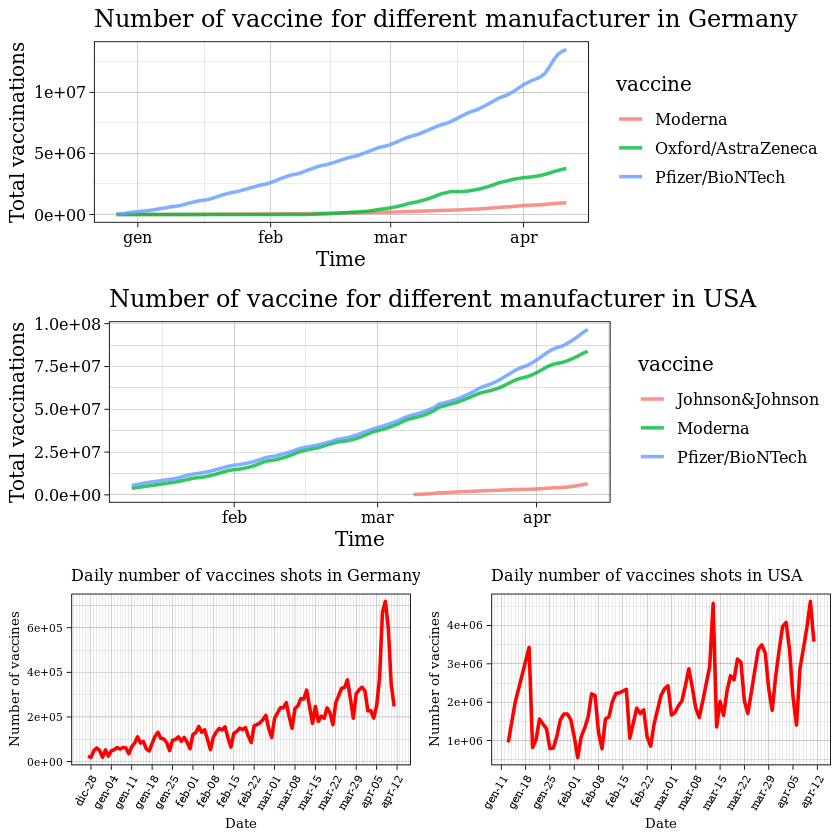

In [7]:
#let' s divide the space for the multiple plots
my_layout <- rbind(c(1,1,1,1),c(1,1,1,1), c(2,2,2,2),c(2,2,2,2),c(3,3,4,4), c(3,3,4,4))

plot_list <- list(G_plot,U_plot,
                  G_plot2,U_plot2)
gridExtra::grid.arrange(grobs = plot_list,layout_matrix = my_layout)

#### 2.1 Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)
Warning message:
“Removed 1 rows containing missing values (position_stack).”

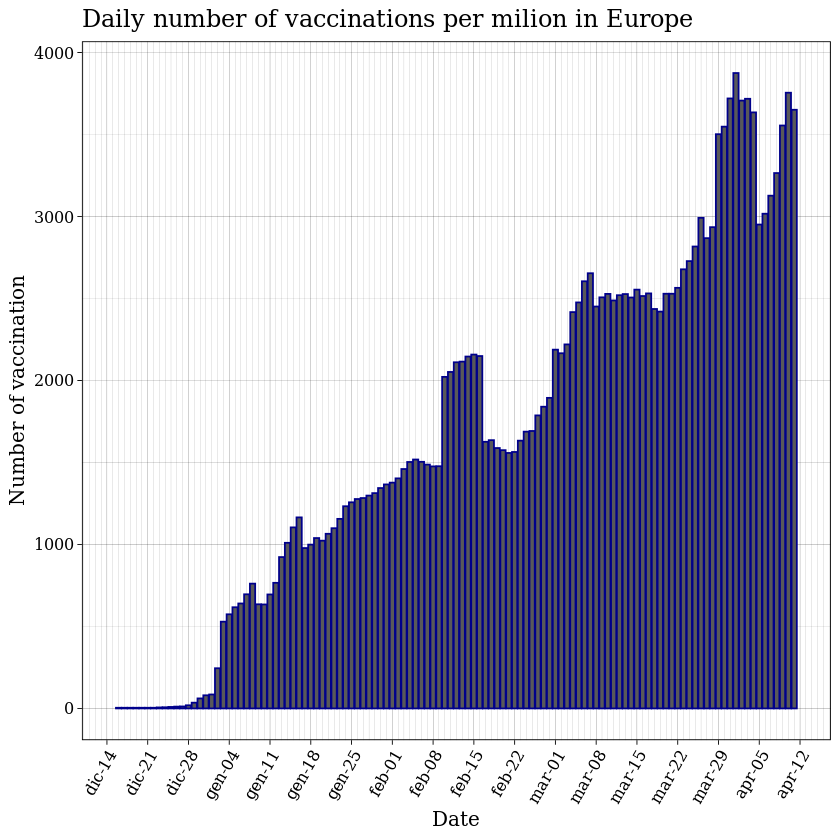

In [8]:
#Load the new dataset
url_part2<-"https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
tibble_part2 <- read_csv(url(url_part2))
#head(tibble_part2)


#Selecting the european countries (the one marked by iso_code=OWID_EUR)

euro_vacc<-tibble_part2%>%filter(iso_code=="OWID_EUR")%>%transmute(date,daily_vaccinations_per_million)
#(euro_vacc)


euro_plot1<-ggplot(euro_vacc, aes(x=date,y=daily_vaccinations_per_million)) + 
            geom_bar(stat='identity',colour="darkblue") +
            labs(title = "Daily number of vaccinations per milion in Europe",
                 x = "Date",
                 y = "Number of vaccination")+
            theme_linedraw()+
            theme(text = element_text(family = "Garamond",size = 12),
                 axis.text.x=element_text(angle=60, hjust=1))+
            scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")

euro_plot1

#### 2.2  Study the data structure and produce few relevant plots of your taste

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”

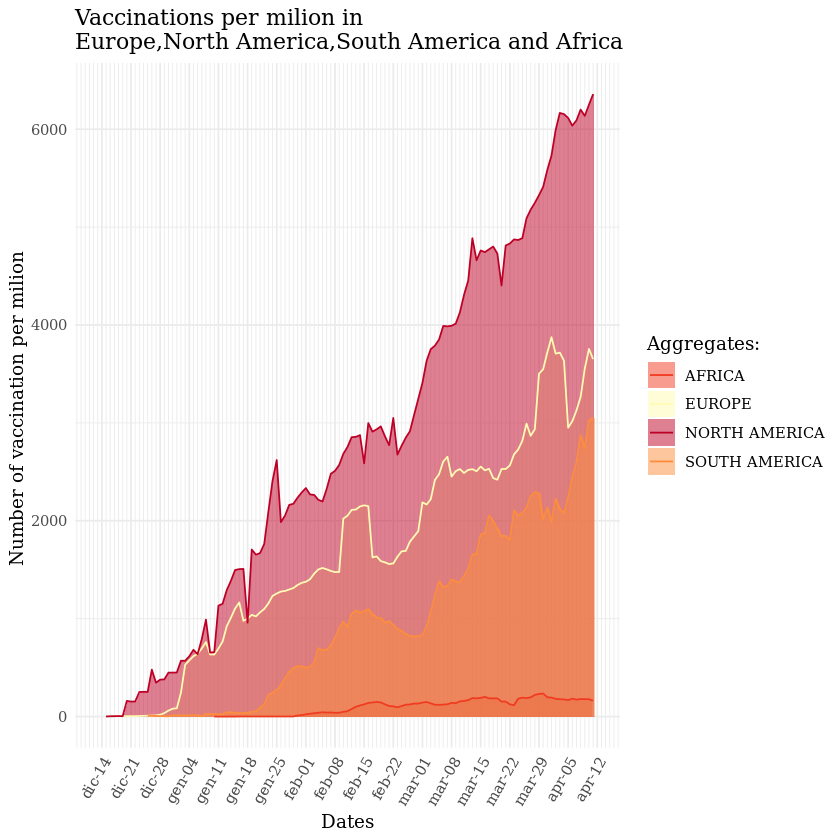

In [9]:
#Here we plot the number of vaccianation per milion people per days in differente aggregates :NAM,SAM,AFR,EUR
#As we can see Africa seem to be left out from the vaccination's campaign

vaccNSAE<-tibble_part2%>%filter(iso_code=="OWID_EUR" |iso_code=="OWID_NAM" | iso_code=="OWID_SAM"| iso_code=="OWID_AFR")%>%
                          transmute(iso_code,date,daily_vaccinations_per_million)






palett<-c("#F03B20", "#FFFBB2","#BD0026","#FD8D3C")

ggplot(vaccNSAE, aes(x=date,y=daily_vaccinations_per_million, fill=iso_code)) + 
    geom_area(alpha = 0.5,position=position_dodge(.9))+
    scale_fill_manual(labels = c("AFRICA", "EUROPE","NORTH AMERICA","SOUTH AMERICA"),values = palett,name = "Aggregates:")+
    theme_minimal()+ 
    geom_line(data=vaccNSAE,aes(colour=iso_code,))+
    scale_colour_manual(labels = c("AFRICA", "EUROPE","NORTH AMERICA","SOUTH AMERICA"),values = palett,name = "Aggregates:")+
    labs(title = "Vaccinations per milion in\nEurope,North America,South America and Africa",
             x = "Dates", y = "Number of vaccination per milion ")+
    theme(text = element_text(family = "Garamond"),
                 axis.text.x=element_text(angle=60, hjust=1))+
    scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")


Warning message:
“Removed 3 row(s) containing missing values (geom_path).”Warning message:
“Removed 3 row(s) containing missing values (geom_path).”

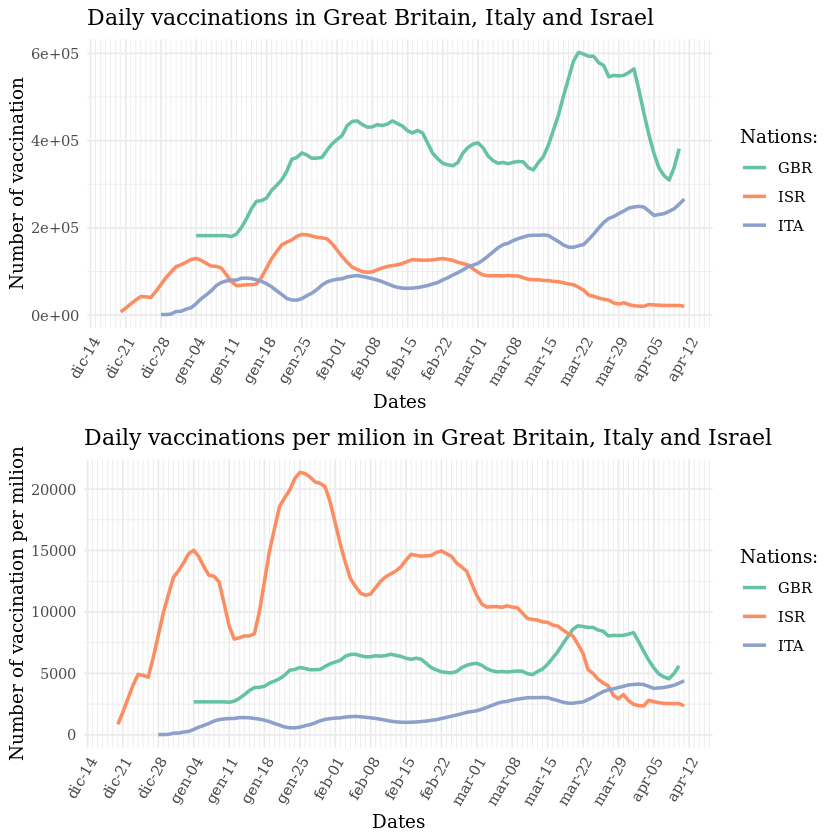

In [11]:
### In this graphs we can appreciates the great work of Israel, that nowadays seem to end up their population
##(or the money to buy them)
### on the other hand we see Italy that is a little late respect to Great Britain

vaccGIIC<-tibble_part2%>%filter(iso_code=="ISR" | iso_code=="GBR"| iso_code=="ITA")%>%
                          transmute(iso_code,date,daily_vaccinations,daily_vaccinations_per_million)




plt1<-ggplot(vaccGIIC, aes(x=date,y=daily_vaccinations, fill=iso_code)) + 
        theme_minimal()+ 
        geom_line(aes(colour=iso_code),size=1)+
        scale_colour_brewer(palette="Set2",name = "Nations:")+
        labs(title = "Daily vaccinations in Great Britain, Italy and Israel",
                 x = "Dates", y = "Number of vaccination")+
        theme(text = element_text(family = "Garamond"),
                     axis.text.x=element_text(angle=60, hjust=1))+
        scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")


plt2<-ggplot(vaccGIIC, aes(x=date,y=daily_vaccinations_per_million, fill=iso_code)) + 
            theme_minimal()+ 
            geom_line(aes(colour=iso_code),size=1)+
            scale_colour_brewer(palette="Set2",name = "Nations:")+
            labs(title = "Daily vaccinations per milion in Great Britain, Italy and Israel",
                     x = "Dates", y = "Number of vaccination per milion")+
            theme(text = element_text(family = "Garamond"),
                         axis.text.x=element_text(angle=60, hjust=1))+
            scale_x_date(date_breaks = "1 week",date_labels = "%b-%d",date_minor_breaks = "1 day")



my_layout <- rbind(c(1,1,1,1),c(1,1,1,1), c(2,2,2,2),c(2,2,2,2))

plot_list <- list(plt1,plt2)
gridExtra::grid.arrange(grobs = plot_list,layout_matrix = my_layout)
